In [39]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import itertools
from collections import Counter

In [40]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [41]:
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [42]:
rating.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [43]:
rating.shape

(7813737, 3)

In [44]:
anime.shape

(12294, 7)

In [45]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [46]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

## Types of anime

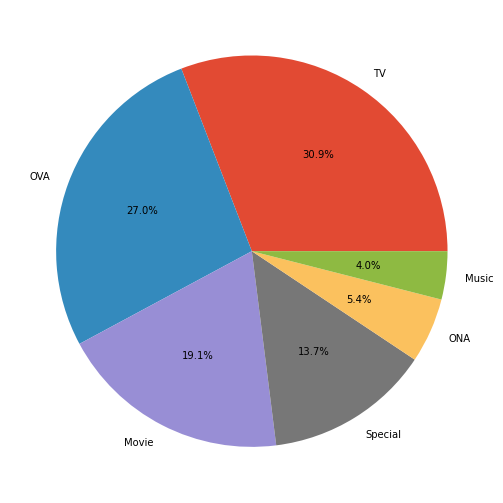

In [47]:
type_anime=anime.type.value_counts()
plt.figure(figsize=(9,9))
plt.pie(type_anime,autopct='%.1f%%',labels=type_anime.index)
plt.show()

<AxesSubplot:xlabel='type', ylabel='rating'>

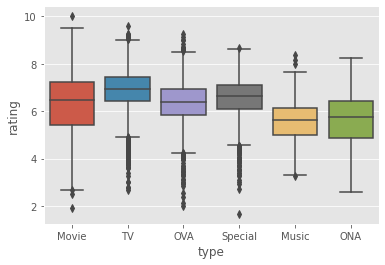

In [48]:
# rating for different types of anime
sns.boxplot(data=anime,x='type',y='rating')

## Genre of anime

<AxesSubplot:xlabel='count', ylabel='genre'>

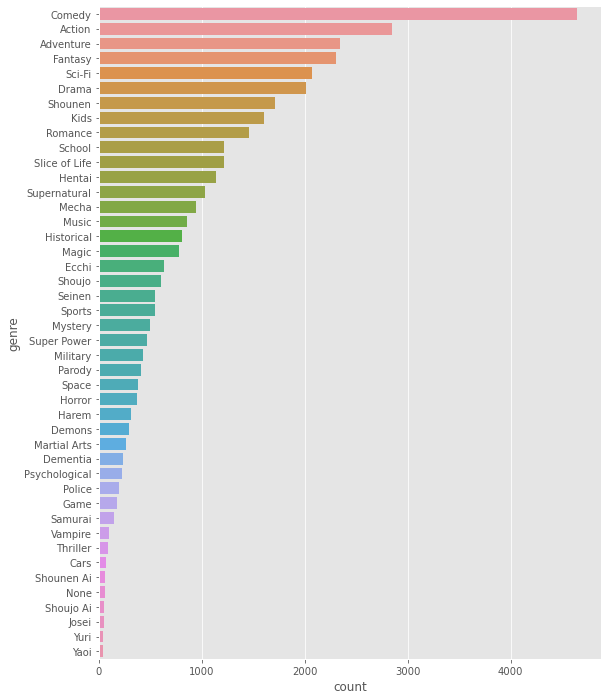

In [49]:
# different anime genres
anime.genre=anime.genre.fillna('None')
genre_anime=anime.genre.apply(lambda x: x.split(', ')).values.tolist()
genre=itertools.chain(*genre_anime) #take a serie of iterable and returns one iterable
genre_count=Counter(genre) #count quantity of eliments

genre_df=pd.DataFrame.from_dict(genre_count,orient='index').reset_index()
genre_df.columns=['genre','count']
genre_df=genre_df.sort_values('count',ascending=False)
plt.figure(figsize=(9,12))
sns.barplot(x=genre_df['count'],y=genre_df['genre'])

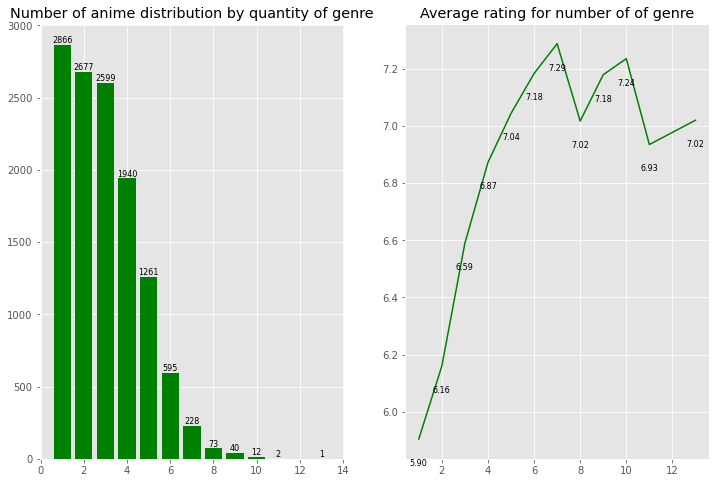

In [50]:
# rating count for geners

def count_genre(func):
    count_of_genre = []
    func["genre"] = func["genre"].astype(str)
    for genre in func["genre"]:
        if genre != 'NaN':
            count = len(genre.split(", "))
            count_of_genre.append(count)
        else:
            count_of_gender.append(-1)
    return count_of_genre

anime["number_genre"] = count_genre(anime)

x = anime["number_genre"].value_counts().index
y = anime["number_genre"].value_counts().values

fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].bar(x,y, color='g')
for i,j in zip(x,y):
    ax[0].text(i,j+0.1,j,ha='center',va="bottom", fontsize=8)
ax[0].set_title("Number of anime distribution by quantity of genre")

r = anime["rating"].groupby(anime["number_genre"]).mean()
xr = r.index
yr= r.values
ax[1].plot(xr,yr, color='g')
for i,j in zip(xr,yr):
    ax[1].text(i,j-0.1,'%.2f'%j,ha='center',va="bottom", fontsize=8)
ax[1].set_title("Average rating for number of of genre")

plt.show()

### There are most anime of a single genre

#### As the number of genre increases, the average rating is higher

# Raiting of anime

C:\Users\Art\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


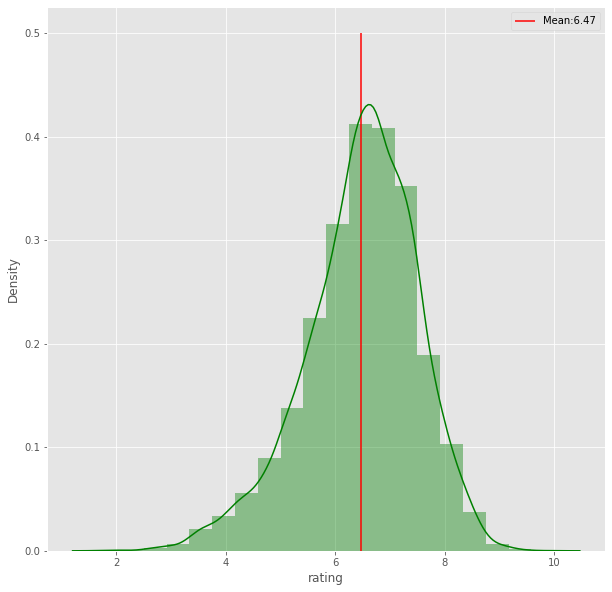

In [51]:
mean_rating=anime['rating'].mean()
plt.figure(figsize=(10,10))
sns.distplot(anime['rating'],bins=20,color='green')
plt.vlines(mean_rating,0,0.5,color='red',label="Mean:%.2f" %mean_rating)
plt.legend()
plt.show()